In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
import datetime 
from pandas_datareader import data as pdr
import time
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import mplcyberpunk
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from webdriver_manager.firefox import GeckoDriverManager
import requests
from bcb import currency
from bcb import sgs
from fpdf import FPDF
from matplotlib.dates import date2num
import warnings

In [15]:
sns.set_style('whitegrid')

indice = ['^BVSP']
hoje = datetime.now()
ultimo_dia = hoje - timedelta(days=366)

dados_mercado_bolsa = pdr.get_data_yahoo(indice, start=ultimo_dia, end=hoje)
dados_mercado_bolsa = dados_mercado_bolsa[['Adj Close','High']]
dados_mercado_bolsa = dados_mercado_bolsa.dropna()
dados_mercado_bolsa = dados_mercado_bolsa.resample('M').last()
dados_mercado_bolsa = dados_mercado_bolsa.pct_change().dropna()
dados_mercado_bolsa

Attributes,Adj Close,High
Symbols,^BVSP,^BVSP
Date,,
2021-11-30,-0.015324,-0.027257
2021-12-31,0.028524,0.021375
2022-01-31,0.072180,0.068643
2022-02-28,0.006709,0.005751
2022-03-31,0.060605,0.068392
2022-04-30,-0.101026,-0.074959
2022-05-31,0.032213,0.000751
2022-06-30,-0.115033,-0.109774


In [58]:
bitcoin = pdr.get_data_yahoo('BTC-USD',
                             start=datetime.datetime(2018,1,1),
                             end=datetime.datetime(2022, 4, 1))

In [59]:
bitcoin

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,10291200000,13657.200195
2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,16846600192,14982.099609
2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,16871900160,15201.000000
2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,21783199744,15599.200195
2018-01-05,17705.199219,15202.799805,15477.200195,17429.500000,23840899072,17429.500000
...,...,...,...,...,...,...
2022-03-29,48022.289062,47100.437500,47100.437500,47465.730469,31397059069,47465.730469
2022-03-30,47655.148438,46746.210938,47456.898438,47062.664062,29333883962,47062.664062
2022-03-31,47512.027344,45390.539062,47062.148438,45538.675781,33327427106,45538.675781


<AxesSubplot: xlabel='Date'>

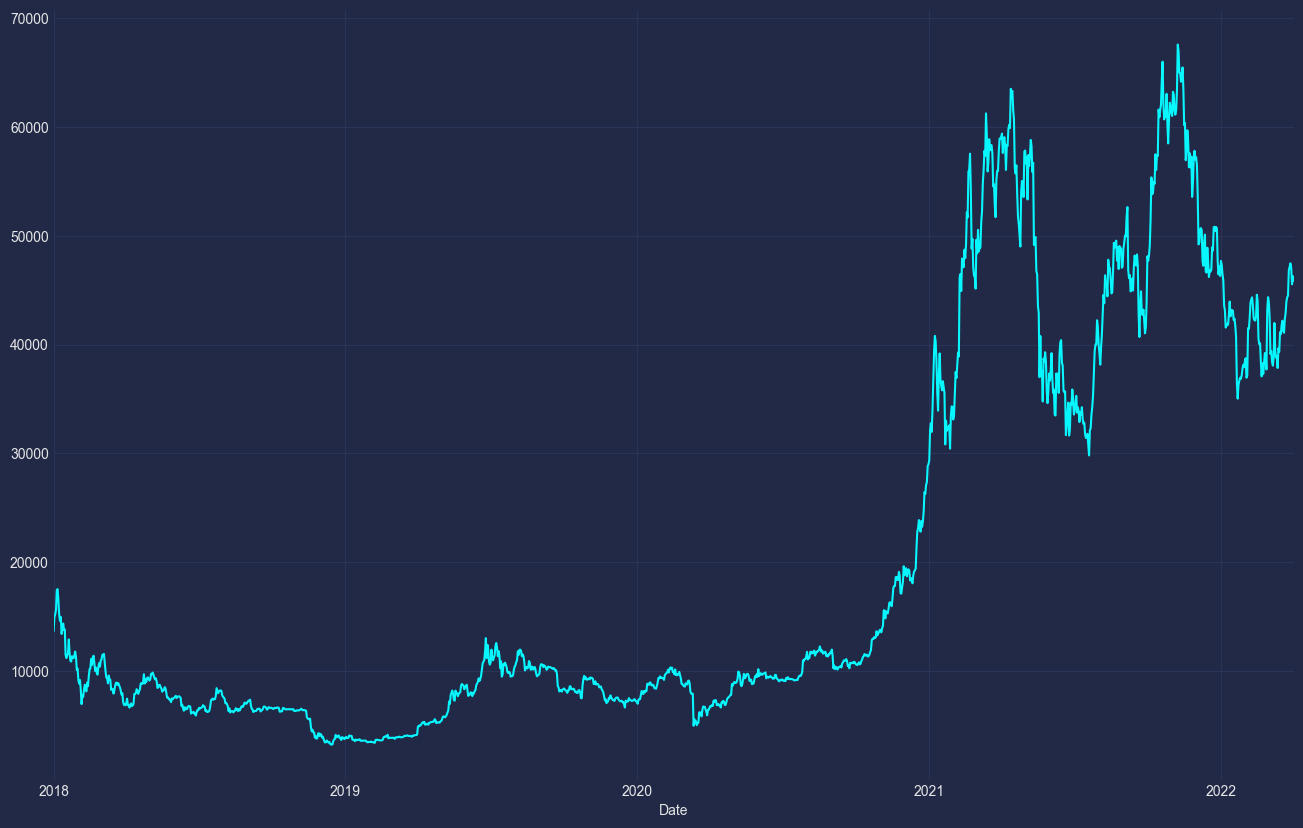

In [60]:
bitcoin['Close'].plot( figsize=(16, 10) )

In [62]:
btc = bitcoin.loc['2021-01':'2022-10'].copy()
btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,40730301359,29374.152344
2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,67865420765,32127.267578
2021-01-03,34608.558594,32052.316406,32129.408203,32782.023438,78665235202,32782.023438
2021-01-04,33440.218750,28722.755859,32810.949219,31971.914062,81163475344,31971.914062
2021-01-05,34437.589844,30221.187500,31977.041016,33992.429688,67547324782,33992.429688
...,...,...,...,...,...,...
2022-03-29,48022.289062,47100.437500,47100.437500,47465.730469,31397059069,47465.730469
2022-03-30,47655.148438,46746.210938,47456.898438,47062.664062,29333883962,47062.664062
2022-03-31,47512.027344,45390.539062,47062.148438,45538.675781,33327427106,45538.675781


In [65]:
btc['MMS_30'] = btc['Close'].rolling( window=30 ).mean() # Média Móvel dos ultimos 30 dias
btc.head(50)

,High,Low,Open,Close,Volume,Adj Close,med_mov_sim_30d,MMS_30
Date,,,,,,,,
2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,40730301359,29374.152344,NaN,NaN
2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,67865420765,32127.267578,NaN,NaN
2021-01-03,34608.558594,32052.316406,32129.408203,32782.023438,78665235202,32782.023438,NaN,NaN
2021-01-04,33440.218750,28722.755859,32810.949219,31971.914062,81163475344,31971.914062,NaN,NaN
2021-01-05,34437.589844,30221.187500,31977.041016,33992.429688,67547324782,33992.429688,NaN,NaN
2021-01-06,36879.699219,33514.035156,34013.613281,36824.363281,75289433811,36824.363281,NaN,NaN
2021-01-07,40180.367188,36491.191406,36833.875000,39371.042969,84762141031,39371.042969,NaN,NaN
2021-01-08,41946.738281,36838.636719,39381.765625,40797.609375,88107519480,40797.609375,NaN,NaN
2021-01-09,41436.351562,38980.875000,40788.640625,40254.546875,61984162837,40254.546875,NaN,NaN


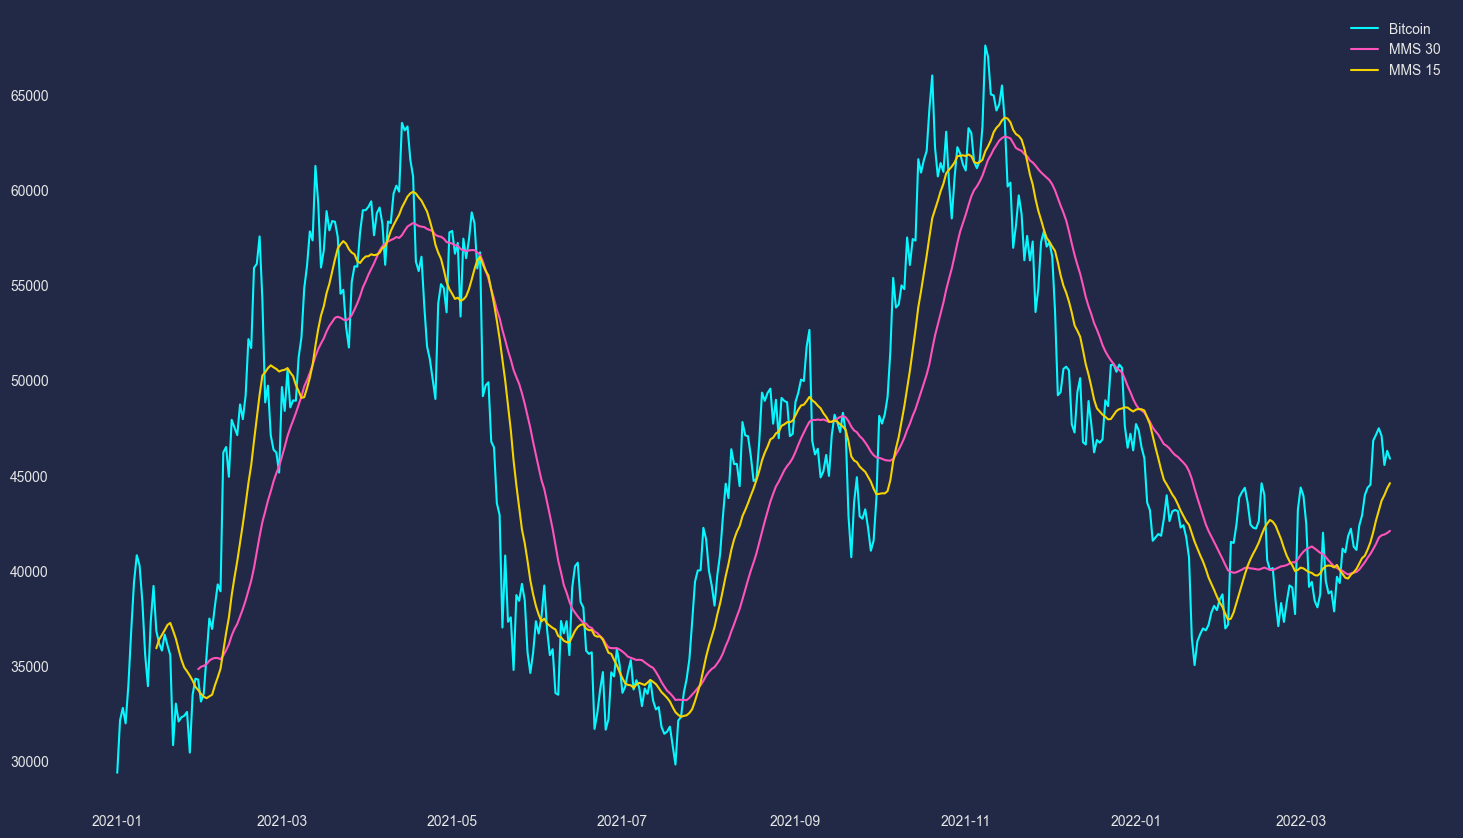

In [69]:
fig = plt.figure( figsize=(14, 8) )

ax = fig.add_axes([0, 0, 1, 1])

ax.plot(btc['Close'], label='Bitcoin')
ax.plot(btc['MMS_30'], label='MMS 30')
ax.plot(btc['Close'].rolling(window=15).mean(), label='MMS 15')


ax.grid(False)

plt.legend()
plt.show()

In [72]:
btc = btc.drop('med_mov_sim_30d', axis=1)
btc

,High,Low,Open,Close,Volume,Adj Close,MMS_30
Date,,,,,,,
2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,40730301359,29374.152344,NaN
2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,67865420765,32127.267578,NaN
2021-01-03,34608.558594,32052.316406,32129.408203,32782.023438,78665235202,32782.023438,NaN
2021-01-04,33440.218750,28722.755859,32810.949219,31971.914062,81163475344,31971.914062,NaN
2021-01-05,34437.589844,30221.187500,31977.041016,33992.429688,67547324782,33992.429688,NaN
...,...,...,...,...,...,...,...
2022-03-29,48022.289062,47100.437500,47100.437500,47465.730469,31397059069,47465.730469,41718.175260
2022-03-30,47655.148438,46746.210938,47456.898438,47062.664062,29333883962,47062.664062,41847.156250
2022-03-31,47512.027344,45390.539062,47062.148438,45538.675781,33327427106,45538.675781,41886.624219


In [79]:
## btc['MMS_30'] = btc['MMS_30'].fillna(0)
btc.head(50)

,High,Low,Open,Close,Volume,Adj Close,MMS_30,MME_30
Date,,,,,,,,
2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,40730301359,29374.152344,0.000000,29374.152344
2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,67865420765,32127.267578,0.000000,30796.595215
2021-01-03,34608.558594,32052.316406,32129.408203,32782.023438,78665235202,32782.023438,0.000000,31502.998962
2021-01-04,33440.218750,28722.755859,32810.949219,31971.914062,81163475344,31971.914062,0.000000,31632.202160
2021-01-05,34437.589844,30221.187500,31977.041016,33992.429688,67547324782,33992.429688,0.000000,32169.211066
2021-01-06,36879.699219,33514.035156,34013.613281,36824.363281,75289433811,36824.363281,0.000000,33079.918267
2021-01-07,40180.367188,36491.191406,36833.875000,39371.042969,84762141031,39371.042969,0.000000,34168.009269
2021-01-08,41946.738281,36838.636719,39381.765625,40797.609375,88107519480,40797.609375,0.000000,35202.465017
2021-01-09,41436.351562,38980.875000,40788.640625,40254.546875,61984162837,40254.546875,0.000000,35924.674770


In [83]:
# Média Móvel Exponencial


btc['MME_30'] = btc['Close'].ewm(span=30).mean()
btc.head(50)

,High,Low,Open,Close,Volume,Adj Close,MMS_30,MME_30
Date,,,,,,,,
2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,40730301359,29374.152344,0.000000,29374.152344
2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,67865420765,32127.267578,0.000000,30796.595215
2021-01-03,34608.558594,32052.316406,32129.408203,32782.023438,78665235202,32782.023438,0.000000,31502.998962
2021-01-04,33440.218750,28722.755859,32810.949219,31971.914062,81163475344,31971.914062,0.000000,31632.202160
2021-01-05,34437.589844,30221.187500,31977.041016,33992.429688,67547324782,33992.429688,0.000000,32169.211066
2021-01-06,36879.699219,33514.035156,34013.613281,36824.363281,75289433811,36824.363281,0.000000,33079.918267
2021-01-07,40180.367188,36491.191406,36833.875000,39371.042969,84762141031,39371.042969,0.000000,34168.009269
2021-01-08,41946.738281,36838.636719,39381.765625,40797.609375,88107519480,40797.609375,0.000000,35202.465017
2021-01-09,41436.351562,38980.875000,40788.640625,40254.546875,61984162837,40254.546875,0.000000,35924.674770


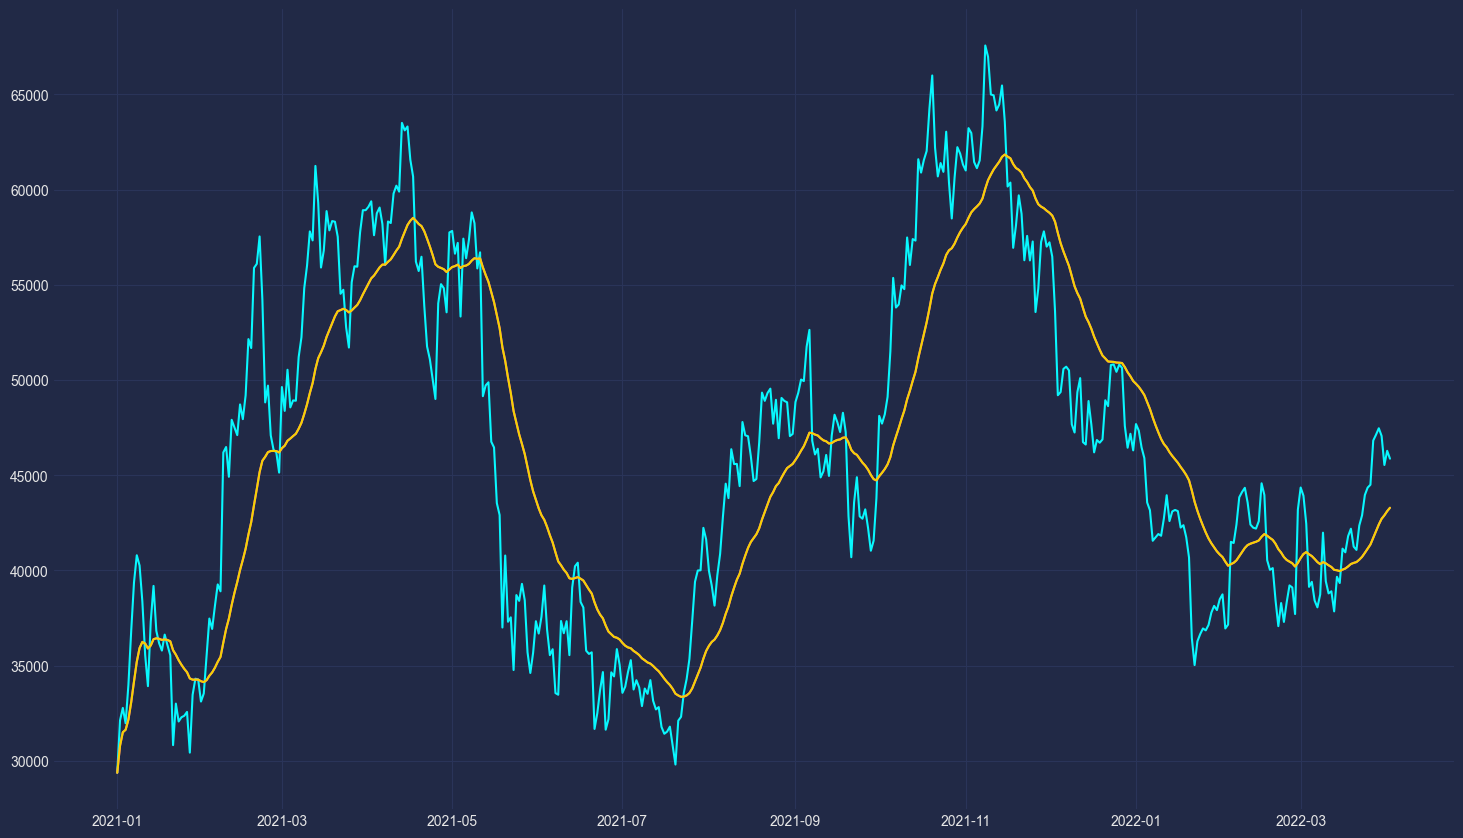

In [86]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(btc['Close'], label='Bitcoin')
ax.plot(btc['MME_30'], label='MME 30')
ax.plot(btc['Close'].ewm(span=15).mean(), label='MME 15')

plt.show()

In [3]:
ping = sns.load_dataset('penguins')
ping.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
ping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
ping.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [6]:
ping.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
ping.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [8]:
ping.columns = ['especies', 'ilha', 'comprimento_bico', 'largura_bico', 'comprimento_asa', 'massa_corporal_g', 'sexo']

In [9]:
ping

,especies,ilha,comprimento_bico,largura_bico,comprimento_asa,massa_corporal_g,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


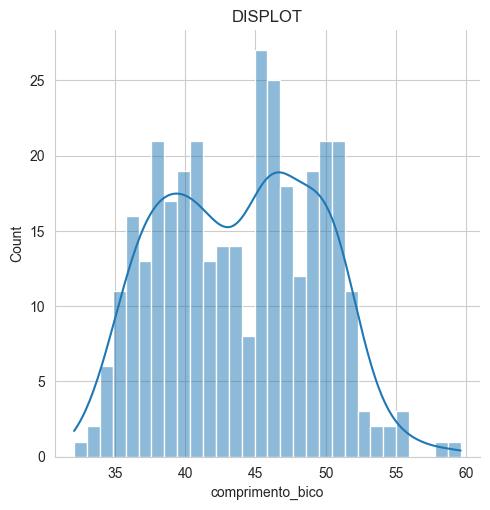

In [10]:
sns.displot(ping['comprimento_bico'], bins=30, kde=True).set(title='DISPLOT')

[Text(0.5, 1.0, 'HISTPLOT')]

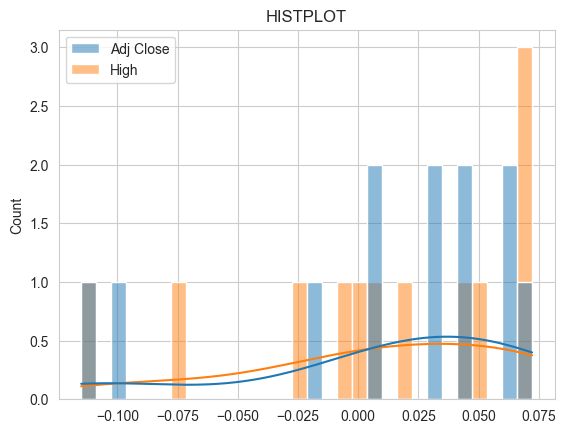

In [11]:
sns.histplot(dados_mercado_bolsa[['Adj Close','High']], bins=30, kde=True).set(title='HISTPLOT')

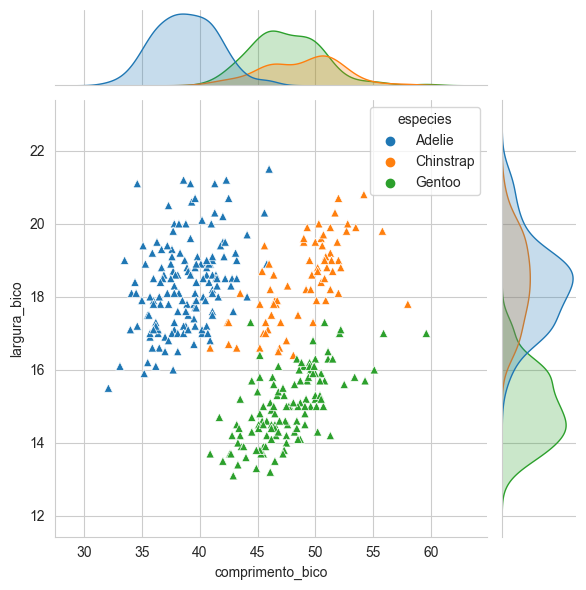

In [12]:
sns.jointplot(data=ping, x='comprimento_bico', y='largura_bico', hue='especies', marker='^')